In [4]:
#all imports go here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy
from scipy import stats
from bioinfokit.analys import stat
from statsmodels.graphics.factorplots import interaction_plot
res=stat()
pd.set_option("display.max_rows",None)

ModuleNotFoundError: No module named 'matplotlib_venn'

In [5]:
#develop fake data
random.seed(50)
N = 50
a = [random.gauss(55,20) for x in range(N)]
b = [random.gauss(50,15) for x in range(N)]

Text(0.5, 1.0, 'Two-Sample T-test')

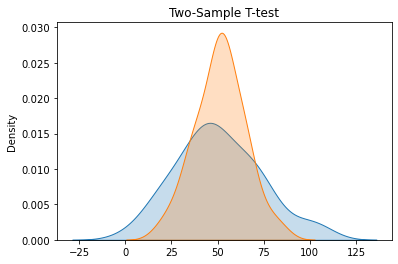

In [6]:
#visualizing
sns.kdeplot(a, shade=True)
sns.kdeplot(b, shade=True)
plt.title("Two-Sample T-test")

In [7]:
#2 sample t test or independent sample 
tStat, pValue = stats.ttest_ind(a, b, equal_var=False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.8521303420279133 T-Statistic:-0.18700897982039738


In [8]:
#1 sample t-test fake data
N = 30
a = [random.gauss(50,15) for x in range(N)]
popmean = 50.05

In [9]:
#1 sample t-test
tStat, pValue = scipy.stats.ttest_1samp(a, popmean, axis=0)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.40763145106167975 T-Statistic:0.840270325124658


In [10]:
#fake data for paired t test / related or repeated measures 
N = 30
a = [random.gauss(60,15) for x in range(N)]
b = [random.gauss(60,15) for x in range(N)]

In [11]:
tStat, pValue = scipy.stats.ttest_rel(a, b, axis=0)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.9563562606069607 T-Statistic:0.055201793284441816


In [16]:
datafile = "/Users/dominicabogado/Documents/gradSchool/INF2178/python/inf2178h-w22-exp-design-datascience/data/PlantGrowth.csv"

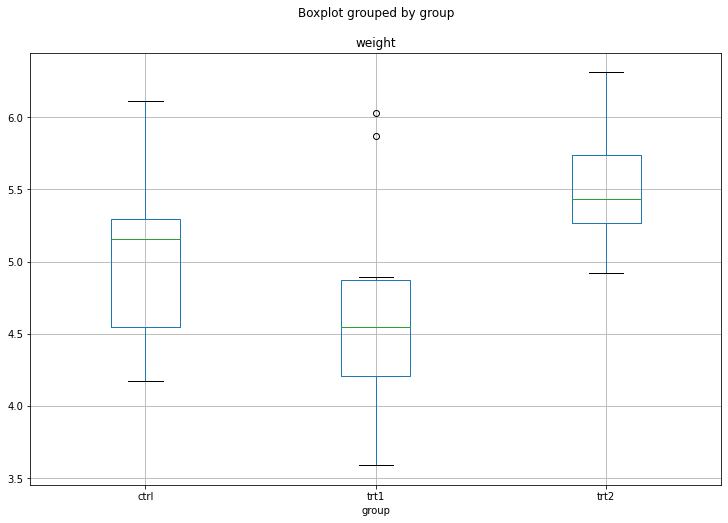

In [17]:
data = pd.read_csv(datafile)
    
#create boxplot
data.boxplot('weight', by='group',figsize=(12,8))

ctrl = data['weight'][data.group == 'ctrl']

grps = pd.unique(data.group.values)
d_data = {grp:data['weight'][data.group == grp] for grp in grps}

k = len(pd.unique(data.group))
N = len(data.values)
n = data.groupby('group').size()[0]

In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('weight ~ group', data=data).fit()

aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

            sum_sq    df         F   PR(>F)
group      3.76634   2.0  4.846088  0.01591
Residual  10.49209  27.0       NaN      NaN


In [19]:
#post hoc tests: tukey hsd
#tukey hsd with bonferroni's correction
pair_t = mod.t_test_pairwise('group')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
trt1-ctrl,-0.371,0.278782,-1.330791,0.194388,-0.943013,0.201013,0.194388,False
trt2-ctrl,0.494,0.278782,1.771996,0.087682,-0.078013,1.066013,0.167675,False
trt2-trt1,0.865,0.278782,3.102787,0.004459,0.292987,1.437013,0.013318,True


In [20]:
import pingouin as pg

aov = pg.anova(data=data, dv='weight',between='group',detailed=True)

/Users/dominicabogado/opt/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [21]:
print(aov)

   Source        SS  DF        MS         F    p-unc       np2
0   group   3.76634   2  1.883170  4.846088  0.01591  0.264148
1  Within  10.49209  27  0.388596       NaN      NaN       NaN


In [24]:
#post hoc test with pingouin
#cohen = effect size
pt = pg.pairwise_tukey(dv='weight',between='group',effsize='cohen',data=data)
print(pt)

      A     B  mean(A)  mean(B)   diff        se         T   p-tukey     cohen
0  ctrl  trt1    5.032    4.661  0.371  0.278782  1.330791  0.392139  0.595148
1  ctrl  trt2    5.032    5.526 -0.494  0.278782 -1.771996  0.198036 -0.792461
2  trt1  trt2    4.661    5.526 -0.865  0.278782 -3.102787  0.011993 -1.387609


In [25]:
#ANOVA = systematic variance / unsystematic variance
#OR
#ANOVA = comparing proportion of variance explained between levels of cateogorical variables
#proportion of variance  = sum of squares
#SS_T = total sum of squares
#SS_T = SS_between + SS_within
#SS_between = SS_T - SS_within

In [26]:
#anything beyond a 1 way anova is called a factorial anova
#don't go beyond a 2 way anova.
#bias-variance tradeoff

d = pd.read_csv("/Users/dominicabogado/Documents/gradSchool/INF2178/python/inf2178h-w22-exp-design-datascience/data/twowayanova.txt", sep="\t")

d.head()

,Genotype,1_year,2_year,3_year
0,A,1.53,4.08,6.69
1,A,1.83,3.84,5.97
2,A,1.38,3.96,6.33
3,B,3.60,5.70,8.55
4,B,2.94,5.07,7.95


In [27]:
d_melt = pd.melt(d, id_vars=['Genotype'], value_vars=['1_year','2_year','3_year'])

d_melt.columns = ['Genotype', 'years', 'value']

d_melt.head()

,Genotype,years,value
0,A,1_year,1.53
1,A,1_year,1.83
2,A,1_year,1.38
3,B,1_year,3.60
4,B,1_year,2.94


<AxesSubplot:xlabel='Genotype', ylabel='value'>

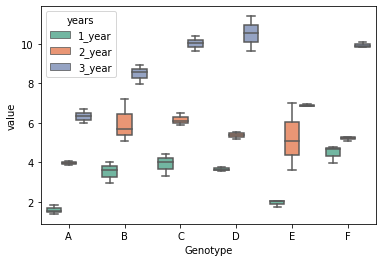

In [28]:
#exploratory data analysis
sns.boxplot(x="Genotype", y="value", hue="years", data=d_melt, palette="Set2")

In [29]:
#doing 2 way anovas with statsmodels
model = ols('value ~ C(Genotype) + C(years) + C(Genotype):C(years)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Genotype),58.551733,5.0,32.748581,1.931655e-12
C(years),278.925633,2.0,390.014868,4.006243e-25
C(Genotype):C(years),17.122967,10.0,4.788525,2.230094e-04
Residual,12.873000,36.0,NaN,NaN


In [30]:
#bioinfokit
res = stat()
res.anova_stat(df=d_melt, res_var='value', anova_model='value ~ C(Genotype) + C(years) + C(Genotype):C(years)')
res.anova_summary

NameError: name 'stat' is not defined

In [ ]:
#interaction plot
fig = interaction_plot(x=d_melt['Genotype'], trace=d_melt['years'], response=d_melt['value'])

plt.show()

In [ ]:
res=stat()
res.tukey_hsd(df=d_melt, res_var='value', xfac_var='Genotype',anova_model='value ~ C(Genotype) + C(years) + C(Genotype):C(years)')
res.tukey_summary

In [ ]:
res=stat()
res.tukey_hsd(df=d_melt, res_var='value', xfac_var='years',anova_model='value ~ C(Genotype) + C(years) + C(Genotype):C(years)')
res.tukey_summary

In [ ]:
res=stat()
res.tukey_hsd(df=d_melt, res_var='value', xfac_var=['Genotype','years'],anova_model='value ~ C(Genotype) + C(years) + C(Genotype):C(years)')
res.tukey_summary